<a href="https://colab.research.google.com/github/OlaOye23/Mauctree/blob/main/Auctree_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**An analysis of scraped auctree.com data using only data with starting bids published**


In [ ]:
#read the data from flatfile into workspace
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 8

df = pd.read_csv('/content/auctree_big.csv')

#**Filter for entries with starting bids**

(array([434., 228.,  33.,  17.,   2.,   0.,   2.,   1.,   0.,   2.]),
 array([  1.192 ,  88.7728, 176.3536, 263.9344, 351.5152, 439.096 ,
        526.6768, 614.2576, 701.8384, 789.4192, 877.    ]),
 <a list of 10 Patch objects>)

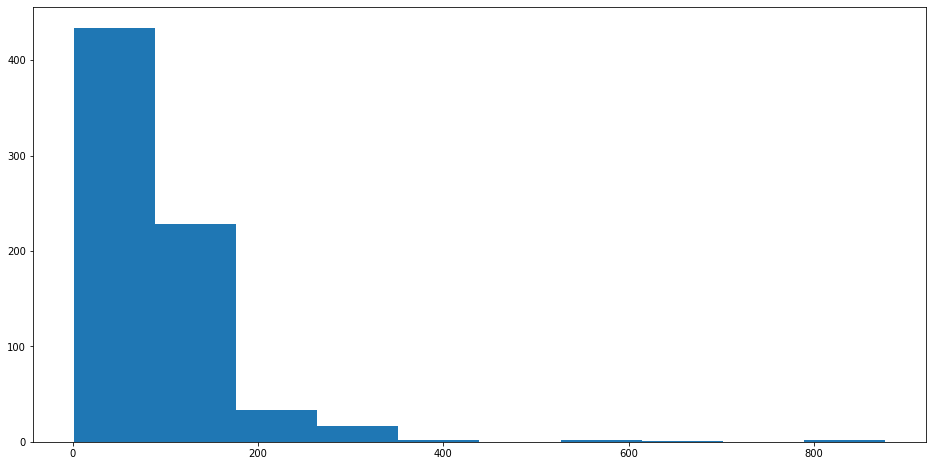

In [ ]:
#filter for data with starting bids
df_= df[df['start_bid'] > 0]
plt.hist(df_['start_bid'])


In [ ]:
#view the filtered table
print((len(df_)/len(df))*100)#percentage of properties with start bids
df_

,Unnamed: 0,number,name,region,city,prop_type,time_left,close_date,start_bid,deposit,sale_type,image,buy_now
0,0,10.0,Avenida el Puente 56,Santa Cruz de la Palma,Santa Cruz de Tenerife,1 x Vivienda,16/07/2021 (18:00),16/07/2021 (18:00),110.000,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,NaN
1,1,11.0,Avenida el Puente 56,Santa Cruz de la Palma,Santa Cruz de Tenerife,1 x Vivienda,16/07/2021 (18:00),16/07/2021 (18:00),175.000,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,NaN
3,3,13.0,Avenida el Puente 56,Santa Cruz de la Palma,Santa Cruz de Tenerife,1 x Vivienda,16/07/2021 (10:00),16/07/2021 (10:00),160.000,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,NaN
5,5,15.0,Avenida el Puente 56,Santa Cruz de la Palma,Santa Cruz de Tenerife,1 x Vivienda,16/07/2021 (18:00),16/07/2021 (18:00),122.000,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,NaN
7,7,17.0,Avenida el Puente 56,Santa Cruz de la Palma,Santa Cruz de Tenerife,1 x Vivienda,06/09/2021 (18:00),06/09/2021 (18:00),105.651,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,121.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1256,1266.0,Cl Rin 14 N2-18,Calafell,Tarragona,1 x Otros,28/09/2022 (18:00),28/09/2022 (18:00),69.793,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,NaN
1257,1257,1267.0,Av Reina Sofia 4,Tomares,Sevilla,1 x Vivienda,28/09/2022 (18:00),28/09/2022 (18:00),175.236,0.2,Cesion de remate,NaN,NaN
1258,1258,1268.0,Cl Severo Ochoa 5,Humanes De Madrid,Madrid,1 x Vivienda,27/07/2022 (18:00),27/07/2022 (18:00),101.109,0.2,Cesion de remate,https://project-radium-files.s3.eu-west-2.amaz...,NaN
1259,1259,1269.0,Cl Rin 14 N2-18,Calafell,Tarragona,1 x Vivienda,28/09/2022 (18:00),28/09/2022 (18:00),69.793,0.2,Cesion de remate,NaN,NaN


In [ ]:
#preview the bids
bids = df_['start_bid']
print(bids.sort_values().head())

1193    1.192
1054    2.000
729     2.919
668     3.254
950     3.579
Name: start_bid, dtype: float64


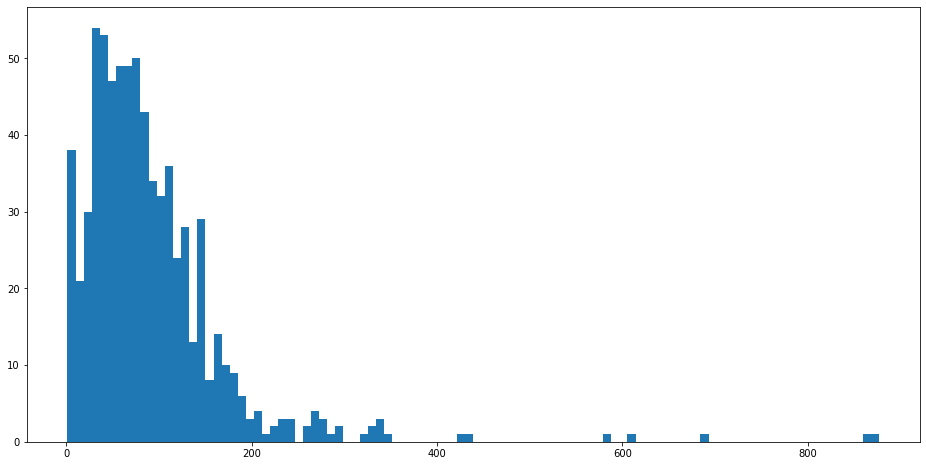

In [ ]:
#histogram of bids distribution
plt.hist(bids, bins = 100);

#**Comparison of start bids and buy it now price**


Text(0, 0.5, 'buy_now')

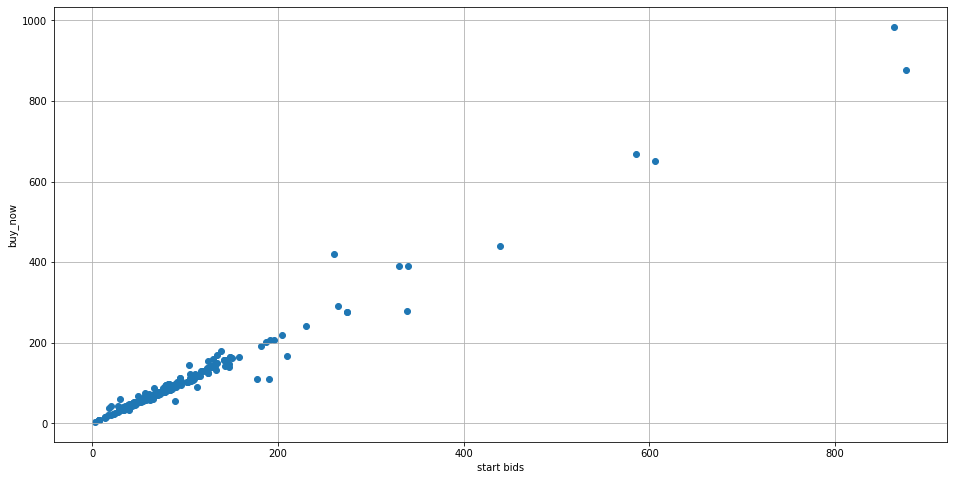

In [ ]:
#compare start bids to buy it now prices for properties with buy it now options
df_bn_bids = df_['start_bid'][df['buy_now']>0]
df_bn_price = df_['buy_now'][df['buy_now']>0]
plt.scatter(df_bn_bids, df_bn_price)
plt.grid()
plt.xlabel('start bids')
plt.ylabel('buy_now')

In [ ]:
#use regression to get coefficient 
import numpy as np
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(df_bn_price, df_bn_bids)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                buy_now   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.811e+04
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                   3.51e-222
Time:                        16:27:08   Log-Likelihood:                         -998.14
No. Observations:                 233   AIC:                                      1998.
Df Residuals:                     232   BIC:                                      2002.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#**Analysis of individual data fields**

In [ ]:
#display count of field values per field
df_.count()

Unnamed: 0    719
number        719
name          712
region        713
city          717
prop_type     719
time_left     719
close_date    719
start_bid     719
deposit       719
sale_type     719
image         550
buy_now       233
dtype: int64

In [ ]:
#display number of unique values for select fields
print('no. of property types: ',len(df_['prop_type'].unique()))
print('no. of sales types: ',len(df_['sale_type'].unique()))
print('no. of cities: ',len(df_['region'].unique()))#I mixed up city and region in inital scraping
print('no. of regions:',len(df_['city'].unique()))#I mixed up city and region in inital scraping

no. of property types:  41
no. of sales types:  2
no. of cities:  333
no. of regions: 45


In [ ]:
#display count of properties per region --* city and region were mixed up in webscrape
df_r = df_['city']
df_ur = df_['city'].unique()
for region in df_ur:
  print(region, len(df_r[df_r == region]))

Santa Cruz de Tenerife 37
Ciudad Real 25
Lugo 1
Madrid 105
Tarragona 36
Cadiz 20
A Coruna 7
Alava 3
Prop2_City, Alava, Alicante 2
TorrejÃ³n de Ardoz, Madrid 1
Almeria 11
Sevilla 39
Baleares 10
Las Palmas 19
Barcelona 51
La Rioja 4
Murcia 62
Valencia 30
Alicante 58
Segovia 2
Girona 29
Castellon 10
Guadalajara 4
Burgos 2
Malaga 8
PORRERES, Baleares 1
Granada 7
Huelva 34
Auction 21
Toledo 32
Valladolid 1
Avila 2
Lerida 9
Zaragoza 9
Fuenlabrada, Madrid 1
Albacete 3
Cordoba 5
Puiggros 1
Fulleda 1
Ourense 5
MEDINA-SIDONIA, Cadiz 3
nan 0
Navarra 1
Jaen 4
Pontevedra 1


In [ ]:
#display count of properties per sale type
df_r = df_['sale_type']
df_ur = df_['sale_type'].unique()
for s_type in df_ur:
  print(s_type, len(df_r[df_r == s_type]))

Cesion de remate 717
Cesion de credito 2


In [ ]:
#display count of propettis per property type
df_r = df_['prop_type']
df_ur = df_['prop_type'].unique()
for p_type in df_ur:
  print(p_type,': ', len(df_r[df_r == p_type]))

1 x Vivienda :  505
1 x Aparcamiento :  53
Valdemoro, Lugo :  1
1 x Otros :  18
1 x Comercio, 2 x Otros :  1
1 x Oficina :  8
14 x Aparcamiento, 5 x Vivienda :  1
10 x Almacen, 10 x Aparcamiento, 10 x Vivienda :  1
1 x Agrario :  5
2 x Vivienda :  8
1 x Agrario, 1 x Vivienda :  2
1 x Comercio :  18
1 x Almacen, 2 x Aparcamiento, 2 x Vivienda :  1
Madrid, Madrid :  1
FUENLABRADA, Madrid :  1
1 x Almacen :  25
7 x Vivienda :  1
1 x Almacen, 1 x Aparcamiento, 1 x Vivienda :  1
, Alicante :  1
1 x Suelo :  22
2 x Comercio, 1 x Vivienda :  1
Auction :  21
1 x Hotelero :  1
1 x Industrial :  1
4 x Vivienda :  2
3 x Vivienda :  1
, Barcelona :  1
13 x Vivienda :  1
23 x Vivienda :  1
Toledo, Toledo :  2
Puertollano, Ciudad Real :  1
Jerez de la Frontera, Cadiz :  1
, Madrid :  1
Formentera Del Segura, Alicante :  1
1 x Aparcamiento, 1 x Vivienda :  3
1 x Aparcamiento, 1 x Hotelero :  1
a, A Coruna :  1
8 x Vivienda :  1
6 x Aparcamiento, 3 x Otros :  1
1 x Almacen, 1 x Vivienda :  1
2 x Aparc

In [ ]:
#get unique text from the property type column
import re
df_pt = df_['prop_type']
pt_str = ''
for prop_type in df_pt:
  pt_str = pt_str + prop_type + " "
pt_str

iter_ = re.finditer(r'([A-Za-z]{3,})', pt_str)
distinct_type = []
for type_ in iter_:
  if type_[0] not in distinct_type:
    distinct_type.append(type_[0])

distinct_type
#flawed -- ended up retrieving city names as well based of inconsistency in scraped text

['Vivienda',
 'Aparcamiento',
 'Valdemoro',
 'Lugo',
 'Otros',
 'Comercio',
 'Oficina',
 'Almacen',
 'Agrario',
 'Madrid',
 'FUENLABRADA',
 'Alicante',
 'Suelo',
 'Auction',
 'Hotelero',
 'Industrial',
 'Barcelona',
 'Toledo',
 'Puertollano',
 'Ciudad',
 'Real',
 'Jerez',
 'Frontera',
 'Cadiz',
 'Formentera',
 'Del',
 'Segura',
 'Coruna']

In [ ]:
#alternative approach
#get unique propety type and no of units from each data entry
df_pt = df_['prop_type']
n_units = []
prop_type = []
for text in df_pt:
  pt1 = []
  if ',' in text:
    pt1 = text.split(',')
  else:
    pt1.append(text) 
  for text in pt1:
    if 'x' in text:
      pt2 = text.split('x')
      n_units.append(pt2[0])
      prop_type.append(pt2[-1])

prop_types = pd.DataFrame([prop_type, n_units]).T
prop_types.columns = ['n_units', 'prop_type']
    
prop_types


,n_units,prop_type
0,Vivienda,1
1,Vivienda,1
2,Vivienda,1
3,Vivienda,1
4,Vivienda,1
...,...,...
699,Otros,1
700,Vivienda,1
701,Vivienda,1
702,Vivienda,1


In [ ]:
#get counts of unique property types
counts = {}
unique_types = []
for i in range(len(prop_type)):
  if prop_type[i] not in unique_types:
    unique_types.append(prop_type[i])
    counts[prop_type[i]] = 1
  else:
    counts[prop_type[i]] += int(n_units[i])

counts

{' Vivienda': 609,
 ' Aparcamiento': 92,
 ' Otros': 23,
 ' Comercio': 21,
 ' Oficina': 8,
 ' Almacen': 29,
 ' Agrario': 7,
 ' Suelo': 22,
 ' Hotelero': 2,
 ' Industrial': 1}